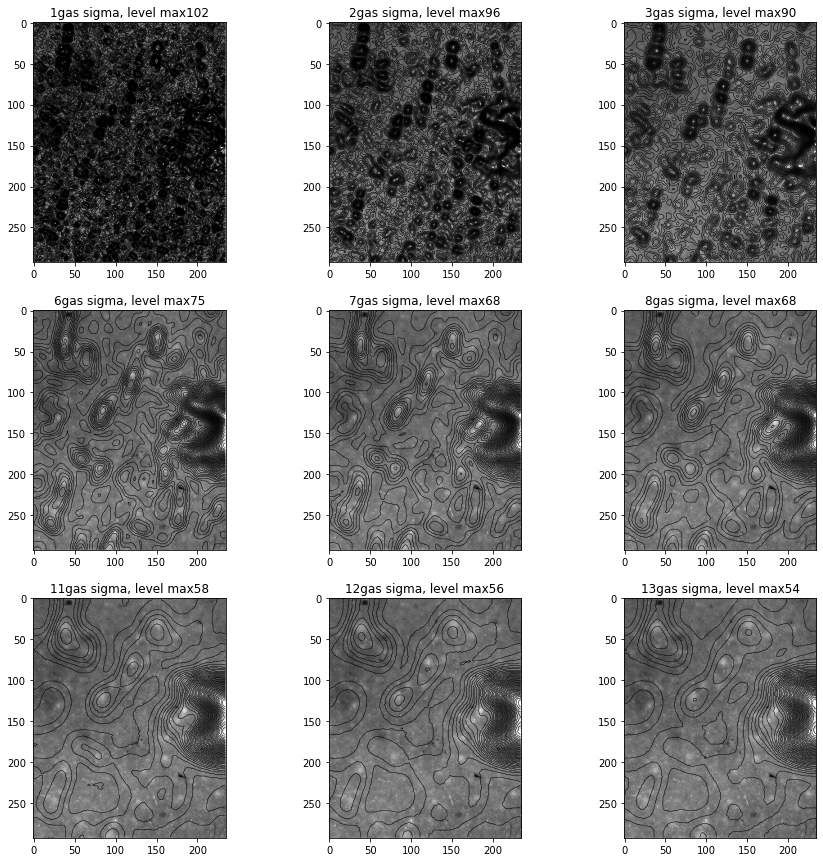

In [34]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import sys
import glob
from scipy.spatial.distance import cdist

path = 'E:\experiment data/aluminum/2020-10-14/3/img'
img = glob.glob(path+'/ff*.jpg')
if not img:
    print("Image read false!")
    sys.exit()

src = cv2.imread(img[0], cv2.IMREAD_GRAYSCALE)[291:584, 156:391]
src1 = cv2.imread(img[1550-299], cv2.IMREAD_GRAYSCALE)[291:584, 156:391]

dst = cv2.absdiff(src,src1)


fig, ax = plt.subplots(3,3, figsize=(15,15))
for i in range(0,3):
    for j in range(0,3):
        gas_sigma = i*5+j*1+1
        gas = cv2.GaussianBlur(dst,(0,0), gas_sigma)
        ax[i][j].imshow(src1,cmap='gray')
        cs = ax[i][j].contour(gas, [k for k in range(2,int(np.max(gas)))],  colors='black', linewidths = 0.5)
        ax[i][j].set_title(str(gas_sigma)+'gas sigma, level max'+str(int(np.max(gas))))
# num_levels = len(cs.allsegs)
# num_element = len(cs.allsegs[0])  # in level 0
# num_vertices = len(cs.allsegs[0][0])  # of element 0, in level 0
# num_coord = len(cs.allsegs[0][0][0])
#
# print(num_levels, num_element, num_vertices, num_coord)
#
# contour= cs.allsegs[0][0] #맨앞이 레벨별 엘리먼트는 0주고 컨투어빼기
#
# scatter_X = cs.allsegs[1][0][:,0].flatten()
# scatter_y = cs.allsegs[1][0][:,1].flatten()
# #ax.scatter(scatter_X,scatter_y, linewidths=0.1)

# distance = cdist(max_point, cs.allsegs[1][0][0])

plt.savefig('./contour.png')